<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/MonteCarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script performs a Monte Carlo simulation to model potential future stock price paths. Here's a breakdown of each step:

1.  **Data Acquisition:**
    The script uses the `yfinance` library to download historical stock data for a specified ticker symbol (`TATAMOTORS.NS` in this case) within a defined date range (from 2020-01-01 to 2025-07-02). This data includes Open, High, Low, Close prices, and Volume.

2.  **Log Return Calculation:**
    Daily log returns are calculated using the formula: `log(Close_today / Close_yesterday)`. Log returns are used because they are time-additive and have desirable statistical properties for financial modeling, such as being approximately normally distributed. Missing values introduced by the shift operation are removed.

3.  **Parameter Estimation:**
    The mean (`mu`) and standard deviation (`sigma`) of the calculated daily log returns are computed. These parameters are crucial for the Monte Carlo simulation as they represent the expected average daily return and the volatility of the stock price, respectively.

4.  **Monte Carlo Simulation Setup:**
    The simulation parameters are defined:
    *   `S0`: The initial stock price, taken as the last available closing price from the historical data.
    *   `T`: The time horizon for the simulation in years (set to 1 year).
    *   `N`: The number of time steps within the time horizon (set to 252, representing the approximate number of trading days in a year).
    *   `M`: The number of individual simulation paths to generate (set to 1000).
    The time step `dt` is calculated as `T / N`. An array `simulations` is initialized to store the simulated price paths.

5.  **Simulation Loop:**
    The script iterates through each time step (`t`) from 1 to `N`. In each step, for every simulation path (`M`), the next day's stock price is calculated using a variation of the Geometric Brownian Motion model:
    `Price_today = Price_yesterday * exp((mu - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * Z)`
    where `Z` is a random variable drawn from a standard normal distribution. This formula incorporates the expected drift (`mu`) and the random volatility (`sigma`) of the stock price.

6.  **Plotting:**
    Finally, the simulated stock price paths are plotted using `matplotlib`. Each individual simulation path is shown in light gray, and the average of all simulation paths at each time step is plotted in blue as the "Expected Path". The plot visualizes the range of potential future stock prices based on the simulation.

## Mathematical Model

The Monte Carlo simulation in this script is based on the **Geometric Brownian Motion (GBM)** model. GBM is a continuous-time stochastic process used to model randomly evolving quantities, most notably stock prices in financial mathematics. It assumes that the logarithm of the asset price follows a Brownian motion with a drift.

The model is characterized by two key components:

1.  **Drift ($\mu$)**: This represents the average rate of return of the stock over time. It's the directional component of the price movement. In the context of the simulation, it's estimated from the mean of the historical log returns.
2.  **Volatility ($\sigma$)**: This measures the randomness or fluctuation of the stock price around its drift. It's the unpredictable component of the price movement. In the simulation, it's estimated from the standard deviation of the historical log returns.

The discrete-time version of the Geometric Brownian Motion formula used in the simulation to calculate the stock price at the next time step ($S_{t+\Delta t}$) based on the current price ($S_t$) is:

$$
S_{t+\Delta t} = S_t \exp\left((\mu - \frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t} Z\right)
$$

Where:
*   $S_{t+\Delta t}$: The stock price at the next time step.
*   $S_t$: The current stock price.
*   $\mu$: The expected daily log return (drift).
*   $\sigma$: The daily volatility (standard deviation of log returns).
*   $\Delta t$: The time step size (e.g., 1 day / number of trading days in a year).
*   $Z$: A random variable drawn from a standard normal distribution ($Z \sim N(0, 1)$).

This formula essentially states that the next price is the current price multiplied by an exponential term. This exponential term has two parts: a deterministic drift component $(\mu - \frac{1}{2}\sigma^2)\Delta t$ which accounts for the average price movement, and a stochastic component $\sigma\sqrt{\Delta t} Z$ which accounts for the random fluctuations driven by volatility. The $\frac{1}{2}\sigma^2$ term is a correction factor that arises from applying Ito's Lemma when discretizing the continuous-time GBM process.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Get historical stock data
ticker = "TATAMOTORS.NS"
data = yf.download(ticker, start="2020-01-01", end="2025-07-02")
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
data = data.dropna()

/tmp/ipython-input-29-1667507781.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-07-02")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

Price,Close,High,Low,Open,Volume,Log Return
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,
Date,,,,,,
2025-06-25,674.500000,679.000000,673.450012,676.000000,10456015,0.001261
2025-06-26,682.750000,683.700012,674.450012,677.000000,10104914,0.012157
2025-06-27,686.900024,691.450012,683.000000,685.000000,7198028,0.006060
2025-06-30,688.000000,691.900024,685.000000,688.900024,6960104,0.001600
2025-07-01,683.799988,693.849976,680.400024,691.099976,6866073,-0.006123


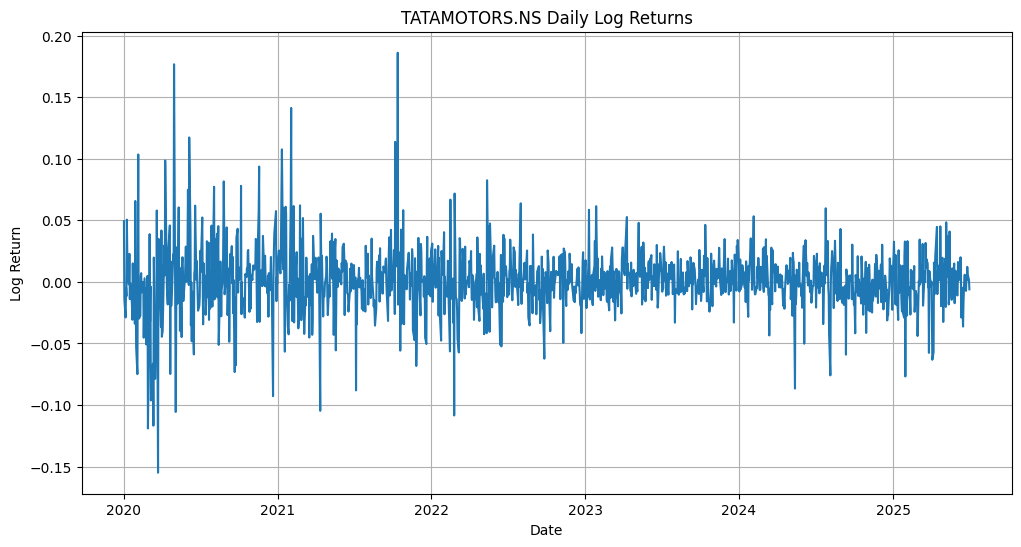

In [ ]:
# Plot the log return

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Log Return'])
plt.title(f'{ticker} Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

In [ ]:
# Estimate parameters
mu = data['Log Return'].mean()
sigma = data['Log Return'].std()

In [ ]:
# Monte Carlo Simulation
S0 = data['Close'].iloc[-1]  # current stock price
T = 1  # time horizon in years
N = 252  # number of time steps (trading days)
M = 1000  # number of simulations

dt = T / N
simulations = np.zeros((N, M))
simulations[0] = S0

np.random.seed(42)
for t in range(1, N):
    Z = np.random.standard_normal(M)  # random normal variables
    simulations[t] = simulations[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

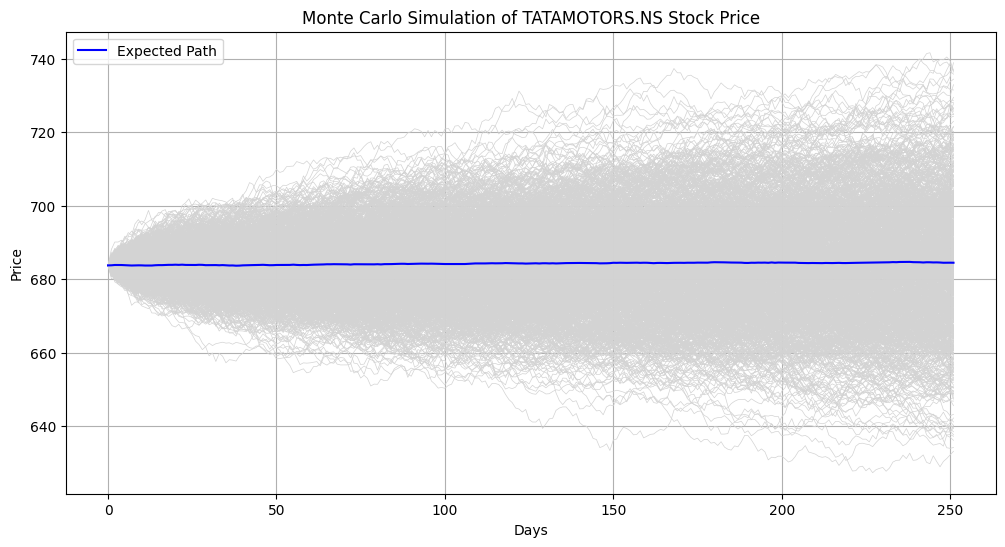

In [ ]:
# Plot simulations
plt.figure(figsize=(12, 6))
plt.plot(simulations, color='lightgray', linewidth=0.5)
plt.plot(simulations.mean(axis=1), color='blue', label='Expected Path')
plt.title(f"Monte Carlo Simulation of {ticker} Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

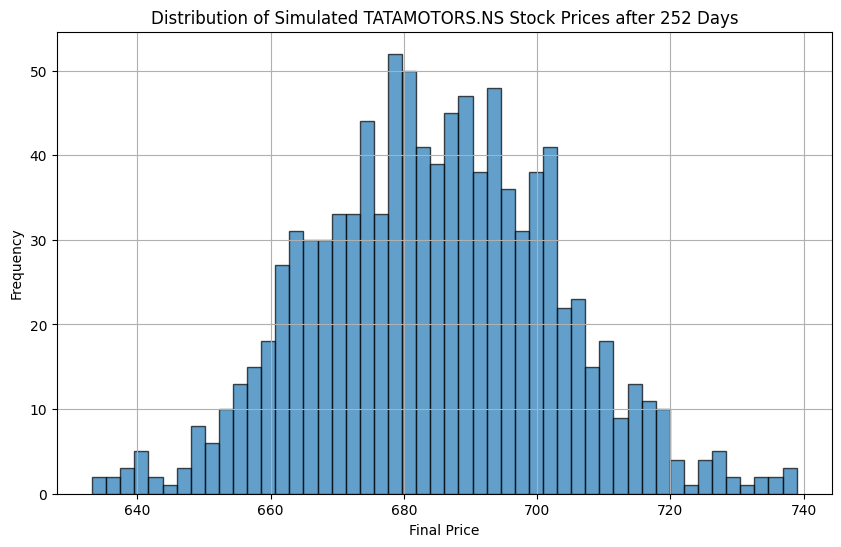

In [ ]:
# Step 5: Plot the distribution of the outcomes at the end of the simulation
plt.figure(figsize=(10, 6))
plt.hist(simulations[-1, :], bins=50, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Simulated {ticker} Stock Prices after {N} Days')
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

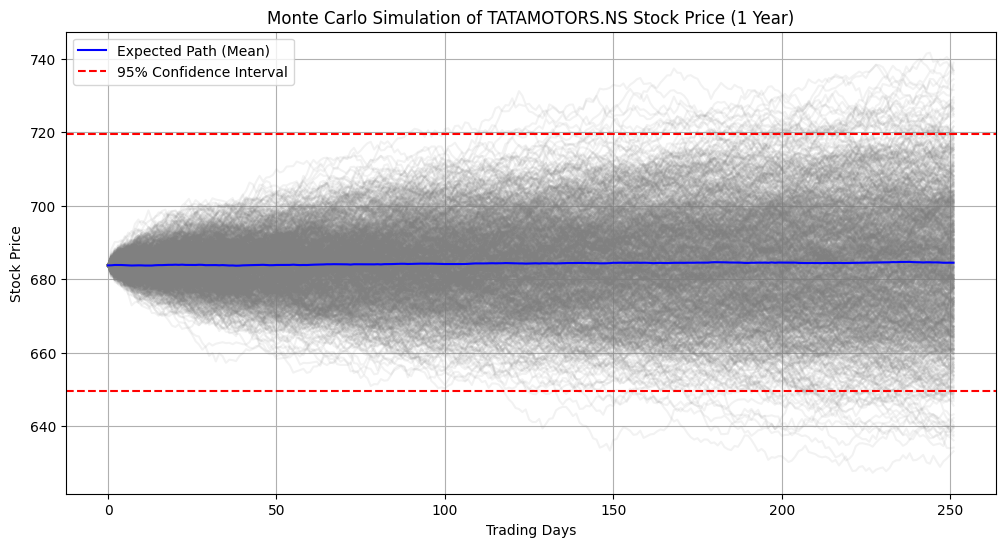

Expected Final Price: 684.52
95% Confidence Interval: [649.73, 719.43]


In [ ]:
# Final prices after 1 year
final_prices = simulations[-1]
mean_final = np.mean(final_prices)
std_final = np.std(final_prices)

# Confidence interval (95%)
ci_lower = np.percentile(final_prices, 2.5)
ci_upper = np.percentile(final_prices, 97.5)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(simulations, color='gray', alpha=0.1)
plt.plot(simulations.mean(axis=1), color='blue', label='Expected Path (Mean)')
plt.axhline(ci_lower, color='red', linestyle='--', label='95% Confidence Interval')
plt.axhline(ci_upper, color='red', linestyle='--')
plt.title(f"Monte Carlo Simulation of {ticker} Stock Price (1 Year)")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"Expected Final Price: {mean_final:.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


**Value at Risk (VaR):** \\
What is the worst expected loss over a given time period at a certain confidence level?

**Parametric VaR (from simulations)** \\
$$
\text{VaR}_{\alpha} = S_0 - \text{Quantile}_{\alpha}(S_T)
$$
where:
* $\alpha = 0.05 $ for 95% confidence interval
* $S_T : $ distribution of th simulated final price  

In [ ]:
# Extract simulated prices at different horizons
day_5 = simulations[4]
day_21 = simulations[20]
day_252 = simulations[-1]

# Compute VaR (95%) for different horizons
alpha = 0.05
# Extract the scalar value from the S0 Series
S0_scalar = S0.iloc[0]

# Summary statistics
def summarize(prices, days):
    mean = np.mean(prices)
    std = np.std(prices)
    ci_lower = np.percentile(prices, 2.5)
    ci_upper = np.percentile(prices, 97.5)
    print(f"\n--- {days} Days ---")
    print(f"Expected Price: {mean:.2f}")
    print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
    # Use the scalar value for S0 in the VaR calculation and formatting
    print(f"VaR (95%): {S0_scalar - np.percentile(prices, 5):.2f}")

summarize(day_5, 5)
summarize(day_21, 21)
summarize(day_252, 252)


--- 5 Days ---
Expected Price: 683.90
95% CI: [679.79, 688.24]
VaR (95%): 3.53

--- 21 Days ---
Expected Price: 683.98
95% CI: [673.65, 694.18]
VaR (95%): 8.47

--- 252 Days ---
Expected Price: 684.52
95% CI: [649.73, 719.43]
VaR (95%): 27.86


Confidence Interval shows range of possible future prices.

VaR shows how much you might lose with 95% confidence.